# Avaliação dos Resultados

- Carregamento dos dados de teste
- Resultado da avaliação *Hit-Rate*
    - *Min, max, average, median* and *std* da avaliação *Hit-Rate*
    - Gráficos da avaliação *Hit-Rate*
- Resultado da avaliação *Precision and Recall*
    - *Min, max, average, median* and *std* da avaliação *Precision and Recall*
    - Gráficos da avaliação *Precision and Recall*
- Resultado da avaliação *Reciprocal Rank*  
    - *Min, max, average, median* and *std* da avaliação *Reciprocal Rank*
    - Gráficos da avaliação *Reciprocal Rank*

In [127]:
%%capture

import operator
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

## Carregamento dos dados de teste

In [128]:
def read_recommendation(file_name):
    r"""This function is used to read the recommendations generated by each RS.

    Args:
        file_name (string): Recommendation file path.

    Returns:
        dict: Returns all recommendations read.
    """
    recommendations = {}
    file_in = open(file_name, 'r')
    
    # for each line
    for row in file_in:
        row = row.rstrip()
        # extracting terminals
        values = row.split("\t")
        terminal = int(values[0])
        recommendations[terminal] = []
        # extracting applications
        values[1] = values[1].replace('[','')
        values[1] = values[1].replace(']','')
        recList = values[1].split(',')
        # saving items
        for tupla in recList:
            v = tupla.split(':')
            recommendations[terminal].append(int(v[0]))
    
    file_in.close()
    
    return recommendations

def statisticInformation(distribution, name):
    
    print("RS:", name)
    print("\t- Min:", np.min(distribution))
    print("\t- Max:", np.max(distribution))
    print("\t- Mean:", np.mean(distribution))
    print("\t- Median:", np.median(distribution))
    print("\t- STD:", np.std(distribution))

def plotDistribution(distribution, x_label, y_label, name):
    
    distribution.sort(reverse=True)
    plt.plot(distribution, alpha=0.5)
    plt.title(name)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()


# Running 03-machine-learning-models.ipynb to declare 
# read_train_and_test_df and create_scores_matrix functions
%run 03-machine-learning-models.ipynb

# Loading train and test data frames
df_train, df_test = read_train_and_test_df('data/applications-by-terminals.csv')

# Creating test matrix of scores
scores_matrix_test = create_scores_matrix(df_test)

## Resultado da avaliação *Hit-Rate*

In [129]:
def metric_hitRate(terminals_targets, test_matrix, recommendation):
    
    hitRate = {}
    
    for u in terminals_targets:
        # apps installed by u in test set
        apps_installed = list(np.nonzero(test_matrix[u,:])[1])
        # hits represented by intersection
        hits = set(recommendation[u]).intersection(set(apps_installed))
        # saving
        hitRate[u] = len(hits)
        
    return hitRate

### *Min, max, average, median* and *std* da avaliação *Hit-Rate*

In [130]:
# Measuring hit-rate and analyzing it.
rec_MostPopular = read_recommendation("data/recList_MostPopular.txt")
terminals_targets = rec_MostPopular.keys()
hitRate_MP = metric_hitRate(terminals_targets, scores_matrix_test, rec_MostPopular)

rec_BestRated = read_recommendation("data/recList_BestRated.txt")
terminals_targets = rec_BestRated.keys()
hitRate_BR = metric_hitRate(terminals_targets, scores_matrix_test, rec_BestRated)

rec_PureSVD = read_recommendation("data/recList_PureSVD.txt")
terminals_targets = rec_PureSVD.keys()
hitRate_SVD = metric_hitRate(terminals_targets, scores_matrix_test, rec_PureSVD)

# Analyzing min, max, average, median and std.
statisticInformation(list(hitRate_MP.values()), "Most-Popular")
statisticInformation(list(hitRate_BR.values()), "Best-Rated")
statisticInformation(list(hitRate_SVD.values()), "PureSVD")

RS: Most-Popular
	- Min: 0
	- Max: 7
	- Mean: 1.100143061516452
	- Median: 1.0
	- STD: 1.1495204276903555
RS: Best-Rated
	- Min: 0
	- Max: 7
	- Mean: 1.106342393896042
	- Median: 1.0
	- STD: 1.157852592402229
RS: PureSVD
	- Min: 0
	- Max: 6
	- Mean: 0.8845970433953266
	- Median: 1.0
	- STD: 1.0330892887556082


### Gráficos da avaliação *hit-rate*

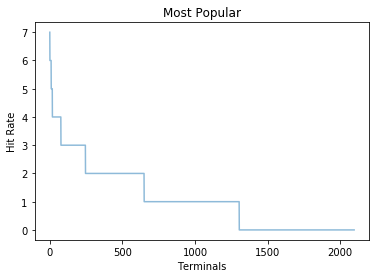

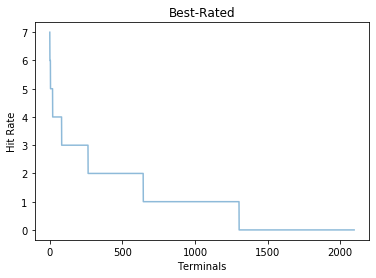

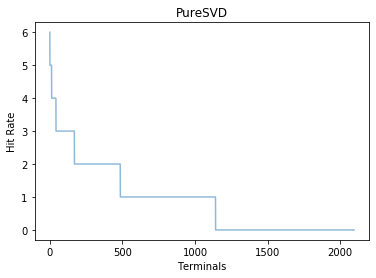

In [131]:
plotDistribution(list(hitRate_MP.values()), "Terminals", "Hit Rate", "Most Popular")
plotDistribution(list(hitRate_BR.values()), "Terminals", "Hit Rate", "Best-Rated")
plotDistribution(list(hitRate_SVD.values()), "Terminals", "Hit Rate", "PureSVD")

## Resultado da avaliação *Precision and Recall*

In [132]:
def metric_precision_recall(terminals_targets, test_matrix, recommendation):
    
    precision = {}
    recall = {}
    
    for u in terminals_targets:
        # apps installed by u in test set
        apps_installed = list(np.nonzero(test_matrix[u,:])[1])
        # measuring u's average score
        mean_score = np.sum(test_matrix[u,:])/float(len(apps_installed))
        # selecting relevant items for u
        relevants = []
        for i in apps_installed:
            if (test_matrix[u,i] >= mean_score):
                relevants.append(i)
        # relevants INT retrieved
        inter = set(recommendation[u]).intersection(set(relevants))
        # measuring precision
        precision[u] = len(inter)/float(len(recommendation[u]))
        # measuring recall            
        recall[u] = len(inter)/float(len(relevants))
    
    return precision, recall    

### *Min, max, average, median* and *std* da avaliação *Precision and Recall*

In [133]:
precision_MP, recall_MP = metric_precision_recall(terminals_targets, scores_matrix_test, rec_MostPopular)
precision_BR, recall_BR = metric_precision_recall(terminals_targets, scores_matrix_test, rec_BestRated)
precision_SVD, recall_SVD = metric_precision_recall(terminals_targets, scores_matrix_test, rec_PureSVD)

**Precision**: Analisando min, max, average, median and std.

In [134]:
statisticInformation(list(precision_MP.values()), "Most-Popular")
statisticInformation(list(precision_BR.values()), "Best-Rated")
statisticInformation(list(precision_SVD.values()), "PureSVD")

RS: Most-Popular
	- Min: 0.0
	- Max: 0.5
	- Mean: 0.0201239866475918
	- Median: 0.0
	- STD: 0.05380499488184528
RS: Best-Rated
	- Min: 0.0
	- Max: 0.5
	- Mean: 0.022508345255126374
	- Median: 0.0
	- STD: 0.05532065501011129
RS: PureSVD
	- Min: 0.0
	- Max: 0.4
	- Mean: 0.035050071530758224
	- Median: 0.0
	- STD: 0.05985923617699695


**Recall:** Analisando min, max, average, median e std.

In [135]:
statisticInformation(list(recall_MP.values()), "Most-Popular")
statisticInformation(list(recall_BR.values()), "Best-Rated")
statisticInformation(list(recall_SVD.values()), "PureSVD")

RS: Most-Popular
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.05021022901503419
	- Median: 0.0
	- STD: 0.15478114504975685
RS: Best-Rated
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.05754952380068091
	- Median: 0.0
	- STD: 0.16525014538333926
RS: PureSVD
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.08942229939452861
	- Median: 0.0
	- STD: 0.18632454897866732


### Gráficos da avaliação *Precision and Recall*

**Precision**: Gráficos de distribuição da avaliação *Precision*.

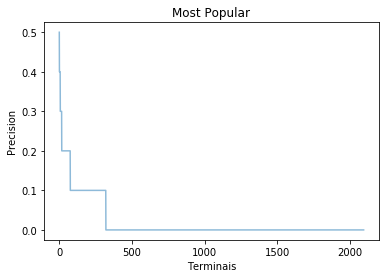

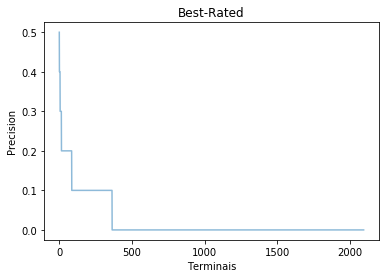

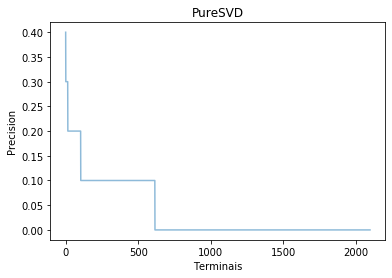

In [136]:
plotDistribution(list(precision_MP.values()), "Terminais", "Precision", "Most Popular")
plotDistribution(list(precision_BR.values()), "Terminais", "Precision", "Best-Rated")
plotDistribution(list(precision_SVD.values()), "Terminais", "Precision", "PureSVD")

**Recall**: Gráficos de distribuição da avaliação *Recall*.

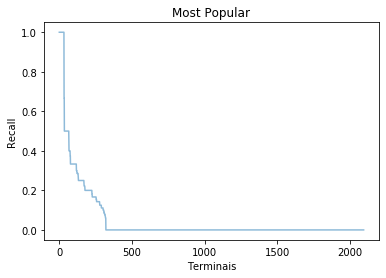

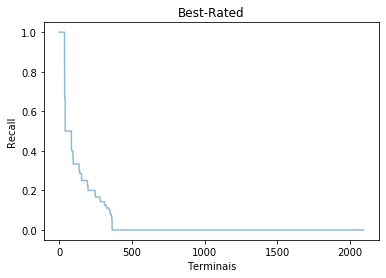

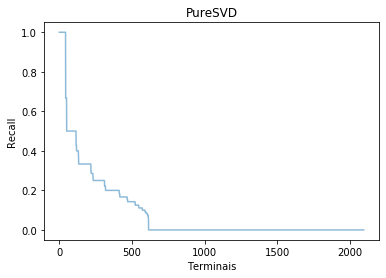

In [137]:
plotDistribution(list(recall_MP.values()), "Terminais", "Recall", "Most Popular")
plotDistribution(list(recall_BR.values()), "Terminais", "Recall", "Best-Rated")
plotDistribution(list(recall_SVD.values()), "Terminais", "Recall", "PureSVD")

## Resultado da avaliação *Reciprocal Rank*

In [138]:
def metric_reciprocalRank(terminals_targets, test_matrix, recommendation):
    
    reciprocalRank = {}
    
    for u in terminals_targets:
        # apps installed by u in test set
        apps_installed = list(np.nonzero(test_matrix[u,:])[1])
        # measuring u's average score
        mean_score = np.sum(test_matrix[u,:])/float(len(apps_installed))
        # selecting relevant items for u
        relevants = []
        for i in apps_installed:
            if (test_matrix[u,i] >= mean_score):
                relevants.append(i)
        # measuring RR
        reciprocalRank[u] = 0
        cont = 1
        for i in recommendation[u]:
            if (i in relevants):
                reciprocalRank[u] = 1/float(cont)
                break
            else:
                cont += 1
                
    return reciprocalRank


### *Min, max, average, median* and *std* da avaliação *Reciprocal Rank*

In [139]:
# Measuring reciprocal rank
reciprocalRank_MP = metric_reciprocalRank(terminals_targets, scores_matrix_test, rec_MostPopular)
reciprocalRank_BR = metric_reciprocalRank(terminals_targets, scores_matrix_test, rec_BestRated)
reciprocalRank_SVD = metric_reciprocalRank(terminals_targets, scores_matrix_test, rec_PureSVD)

# Analyzing min, max, average, median and std.
statisticInformation(list(reciprocalRank_MP.values()), "Most-Popular")
statisticInformation(list(reciprocalRank_BR.values()), "Best-Rated")
statisticInformation(list(reciprocalRank_SVD.values()), "PureSVD")

RS: Most-Popular
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.05349762699548107
	- Median: 0.0
	- STD: 0.17190433865687058
RS: Best-Rated
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.06701050631665795
	- Median: 0.0
	- STD: 0.18789073708545886
RS: PureSVD
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.09131790691161219
	- Median: 0.0
	- STD: 0.20444573631213184


### Gráficos da avaliação *Reciprocal Rank*

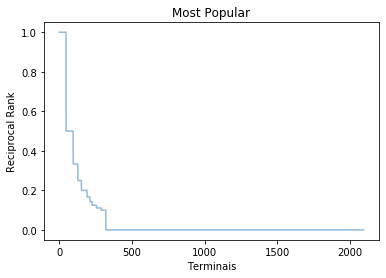

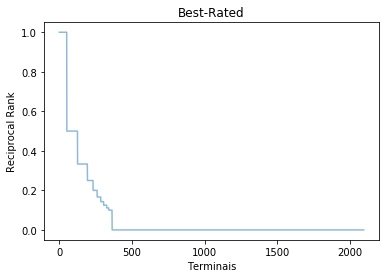

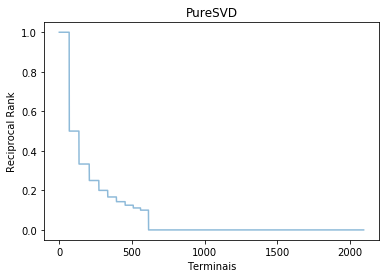

In [140]:
plotDistribution(list(reciprocalRank_MP.values()), "Terminais", "Reciprocal Rank", "Most Popular")
plotDistribution(list(reciprocalRank_BR.values()), "Terminais", "Reciprocal Rank", "Best-Rated")
plotDistribution(list(reciprocalRank_SVD.values()), "Terminais", "Reciprocal Rank", "PureSVD")